In [8]:
import numpy as np

# Load the data from CSV into numpy arrays
# The argument 'dtype=str' tells np.loadtxt to read all the data as strings.
male = np.loadtxt('/content/nhanes_adult_male_bmx_2020.csv', delimiter=',', skiprows=1, dtype=str)
female = np.loadtxt('/content/nhanes_adult_female_bmx_2020.csv', delimiter=',', skiprows=1, dtype=str)

# Print the data type of male to check
print(male.dtype)

# If you need numerical data, you can convert the relevant columns to appropriate types after loading.

<U5


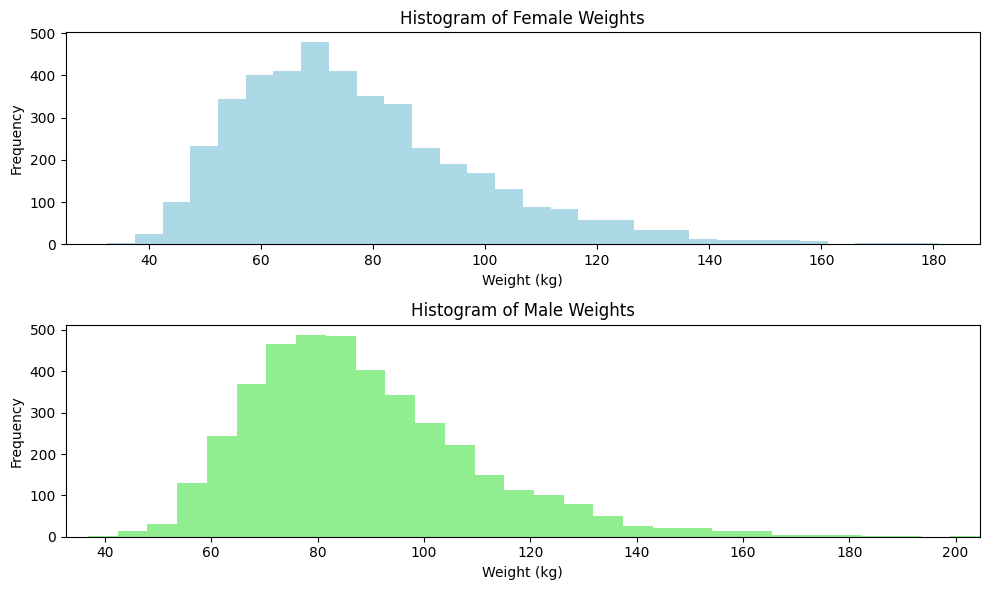

In [9]:
import matplotlib.pyplot as plt

# Extract weights and convert to numeric type
male_weights = male[1:, 0].astype(float) # Convert to numeric type. Skip the header row by starting from index 1
female_weights = female[1:, 0].astype(float) # Convert to numeric type. Skip the header row by starting from index 1

# Plot histograms
plt.figure(figsize=(10, 6))

# Subplot 1: Female Weights
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, color='lightblue')
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Subplot 2: Male Weights
plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, color='lightgreen')
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Ensure same x-axis limits
plt.xlim([min(female_weights.min(), male_weights.min()), max(female_weights.max(), male_weights.max())])

plt.tight_layout()
plt.show()


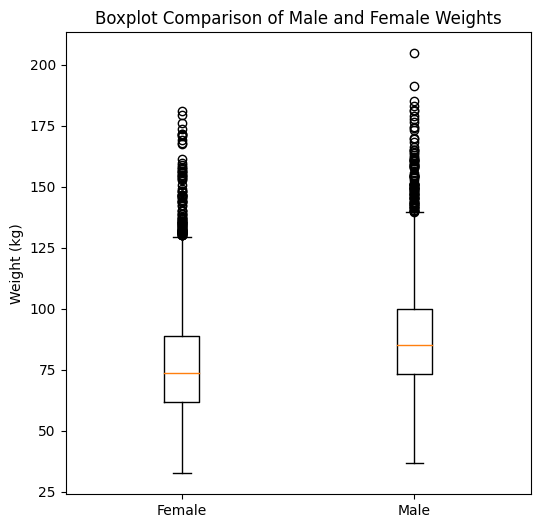

In [10]:
# Boxplot of male and female weights
plt.figure(figsize=(6, 6))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title('Boxplot Comparison of Male and Female Weights')
plt.ylabel('Weight (kg)')
plt.show()


In [11]:
from scipy.stats import skew, kurtosis

def summary_stats(data):
    return {
        'mean': np.mean(data),
        'median': np.median(data),
        'std_dev': np.std(data),
        'skewness': skew(data),
        'kurtosis': kurtosis(data)
    }

male_stats = summary_stats(male_weights)
female_stats = summary_stats(female_weights)

print("Male Weight Stats:", male_stats)
print("Female Weight Stats:", female_stats)


Male Weight Stats: {'mean': 88.36198529411766, 'median': 85.0, 'std_dev': 21.420938274240076, 'skewness': 0.9845762359363733, 'kurtosis': 1.4741689951759014}
Female Weight Stats: {'mean': 77.39912322274881, 'median': 73.6, 'std_dev': 21.542926543656616, 'skewness': 1.0340146022703682, 'kurtosis': 1.4023996160487355}


In [12]:
# Convert height from cm to meters
female_height_m = female[1:, 1].astype(float) / 100 # Convert the values to floats allowing division and skip the header row
female_bmi = female[1:, 0].astype(float) / (female_height_m ** 2) # Convert the values to floats allowing division and skip the header row

# Add BMI column
female = np.column_stack([female[1:], female_bmi]) # Slice female array to exclude the header row for consistent dimensions
print("Updated female matrix shape:", female.shape)


Updated female matrix shape: (4220, 8)


In [13]:
# Convert height from cm to meters
female_height_m = female[1:, 1].astype(float) / 100 # Convert the values to floats allowing division and skip the header row
female_bmi = female[1:, 0].astype(float) / (female_height_m ** 2) # Convert the values to floats allowing division and skip the header row

# Add BMI column
female = np.column_stack([female[1:], female_bmi]) # Slice female array to exclude the header row for consistent dimensions
print("Updated female matrix shape:", female.shape)

# Convert all columns of the 'female' array to numeric type
female = female.astype(float)

# Compute z-scores
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)
print("Standardized female matrix (first 5 rows):")
print(zfemale[:5])


Updated female matrix shape: (4219, 9)
Standardized female matrix (first 5 rows):
[[-0.20403754  0.15028954  0.58313751  0.26193572 -0.16191178 -0.19014851
  -0.37257521 -0.25877484 -0.25877484]
 [-0.72853464 -0.38774319  0.83889036 -0.76476824 -0.66107567 -0.52301346
  -0.45878737 -0.66990684 -0.66990684]
 [-1.02095339 -0.78418837 -0.61037579 -0.98255393 -0.78586665 -1.06711964
  -1.45310095 -0.89242334 -0.89242334]
 [-0.71460994 -2.18590523 -1.50551076 -0.92032945 -0.51845742 -0.15814226
  -0.78639358 -0.06296881 -0.06296881]
 [-0.51966411  0.90070362  0.62576299  0.13748676 -0.12625721 -0.82387217
  -0.15991855 -0.80203575 -0.80203575]]


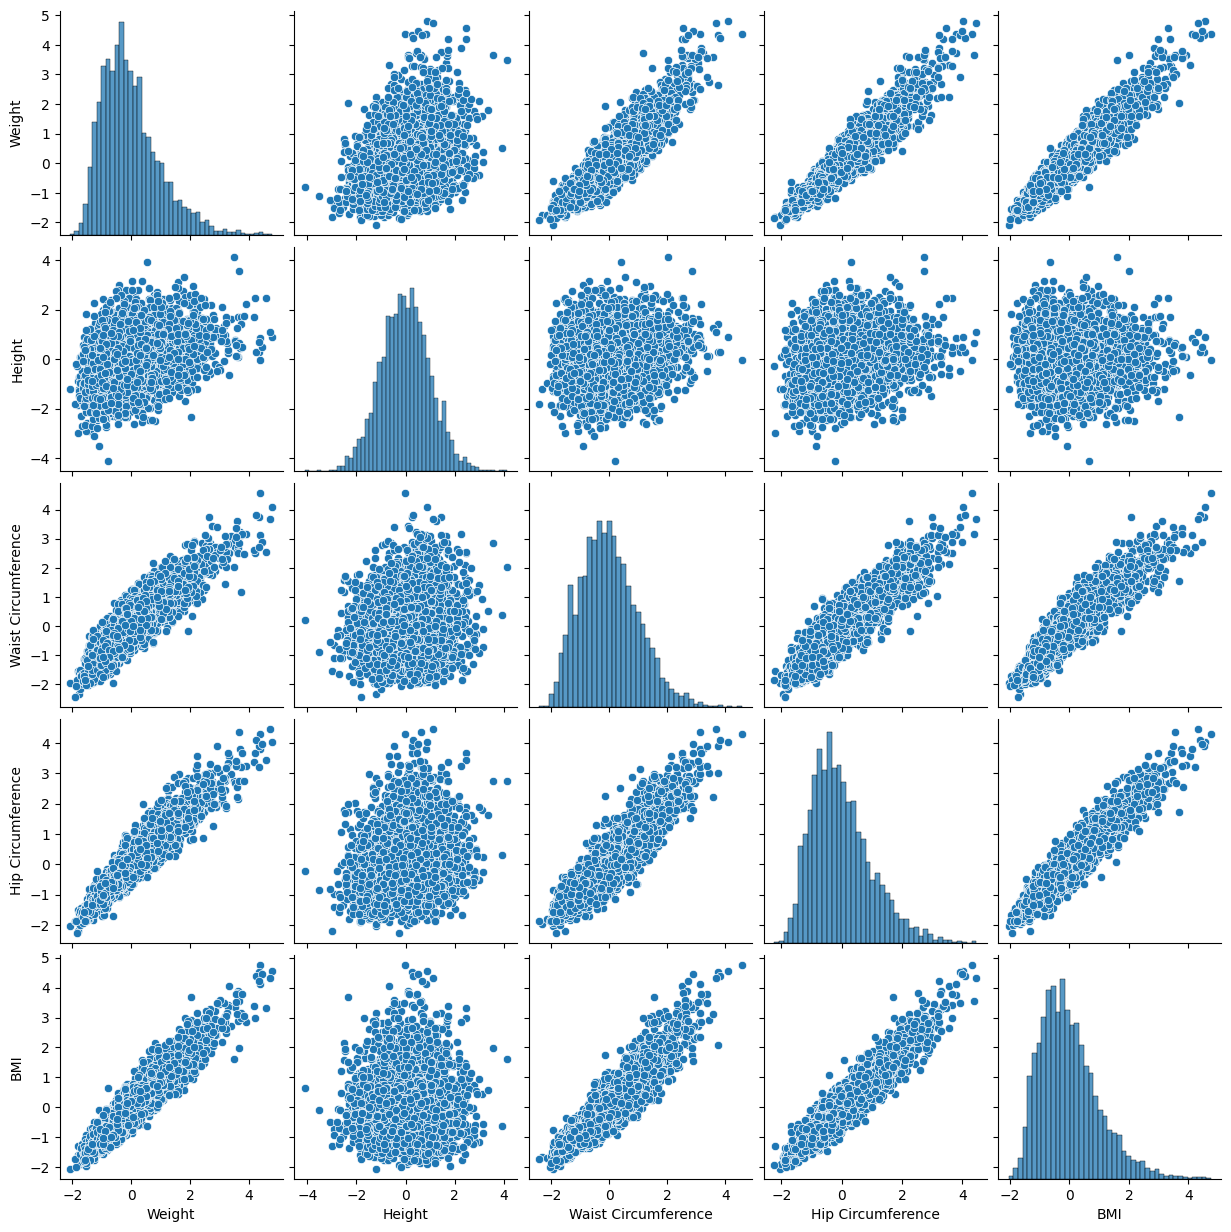

Pearson Correlation Matrix:
                       Weight    Height  Waist Circumference  \
Weight               1.000000  0.345749             0.904543   
Height               0.345749  1.000000             0.126647   
Waist Circumference  0.904543  0.126647             1.000000   
Hip Circumference    0.946554  0.203234             0.897436   
BMI                  0.945910  0.033377             0.921260   

                     Hip Circumference       BMI  
Weight                        0.946554  0.945910  
Height                        0.203234  0.033377  
Waist Circumference           0.897436  0.921260  
Hip Circumference             1.000000  0.944171  
BMI                           0.944171  1.000000  
Spearman Correlation Matrix:
                       Weight    Height  Waist Circumference  \
Weight               1.000000  0.339264             0.900133   
Height               0.339264  1.000000             0.108731   
Waist Circumference  0.900133  0.108731             1.000000

In [14]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for the scatterplot matrix
# Updated column names to match the zfemale array
zfem_df = pd.DataFrame(zfemale, columns=['Weight', 'Height', 'Upper Arm Length', 'Upper Leg Length',
                                         'Arm Circumference', 'Hip Circumference', 'Waist Circumference', 'BMI', 'Unnamed: 0'])

# Scatterplot matrix
sns.pairplot(zfem_df[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']])
plt.show()

# Compute correlations
pearson_corr = zfem_df[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']].corr()
spearman_corr = zfem_df[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']].corr(method='spearman')

print("Pearson Correlation Matrix:")
print(pearson_corr)

print("Spearman Correlation Matrix:")
print(spearman_corr)

In [ ]:
# Convert 'male' to a numeric NumPy array
# Remove the first row (containing headers)
male = male[1:].astype(float)

# Waist-to-height and waist-to-hip ratios
male_waist_to_height = male[:, 6] / male[:, 1]
male_waist_to_hip = male[:, 6] / male[:, 5]

female_waist_to_height = female[:, 6] / female[:, 1]
female_waist_to_hip = female[:, 6] / female[:, 5]

# Add columns
male = np.column_stack([male, male_waist_to_height, male_waist_to_hip])
female = np.column_stack([female, female_waist_to_height, female_waist_to_hip])

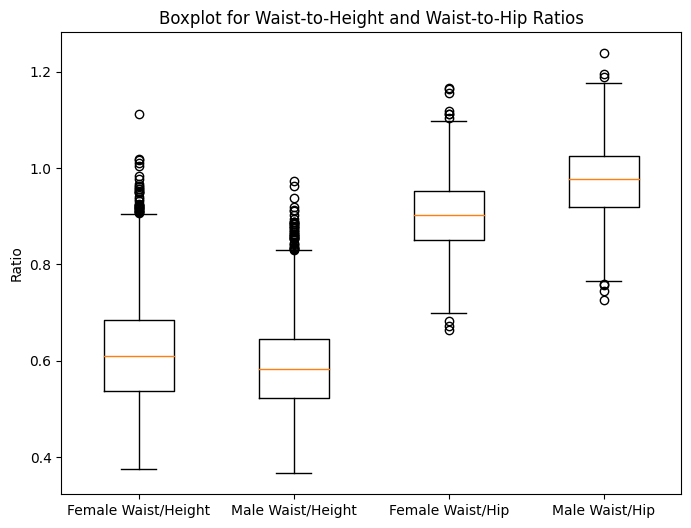

In [ ]:
# Boxplot for waist-to-height and waist-to-hip ratios
plt.figure(figsize=(8, 6))
plt.boxplot([female_waist_to_height, male_waist_to_height, female_waist_to_hip, male_waist_to_hip],
            labels=['Female Waist/Height', 'Male Waist/Height', 'Female Waist/Hip', 'Male Waist/Hip'])
plt.title('Boxplot for Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio')
plt.show()


In [ ]:
# Get indices of 5 lowest and 5 highest BMI
lowest_bmi_indices = np.argsort(female_bmi)[:5]
highest_bmi_indices = np.argsort(female_bmi)[-5:]

# Print standardized data for these individuals
print("Standardized body measurements for 5 individuals with lowest BMI:")
print(zfemale[lowest_bmi_indices])

print("Standardized body measurements for 5 individuals with highest BMI:")
print(zfemale[highest_bmi_indices])


Standardized body measurements for 5 individuals with lowest BMI:
[[-2.0795282  -1.22284445 -1.54785032 -1.1688276  -2.19444948 -2.04033488
  -1.94191331 -2.05000262 -2.05000262]
 [-1.87992672 -0.18926859 -1.71834889  0.38666041 -2.44402948 -1.85470068
  -2.05687552 -1.99464225 -1.99464225]
 [-1.5364265   1.80709026  0.62600653  0.57331897 -2.26575805 -1.67546767
  -1.70624078 -1.97064622 -1.97064622]
 [-1.84279156 -0.26006146 -0.22648635  0.51109945 -2.30141234 -2.25157379
  -1.85569165 -1.94153833 -1.94153833]
 [-1.61069682  0.88678299 -0.09861242  0.47998969 -2.21227663 -1.82909597
  -1.71198889 -1.89295821 -1.89295821]]
Standardized body measurements for 5 individuals with highest BMI:
[[ 4.2473745   0.29212291  1.86212121 -0.98216904  2.36929911  4.10479704
   3.81769338  4.39672482  4.39672482]
 [ 4.45625977  0.50450151  1.69162264 -1.13771784  3.34979198  3.98317464
   2.90374381  4.46224439  4.46224439]
 [ 4.34949618  0.27796433  2.84248803  1.94214841  4.36593913  3.91916285
 